## Analyzing Uber data to gain business insights. 
I will be looking at 
-the rush by the hour for the NYC location 
-analyzing the total trips in NYC to understand the demand.

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [226]:
uber_15 = pd.read_csv(r"/Users/Lexx/Documents/Uber/uber-raw-data-janjune-15_sample.csv")

In [227]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [228]:
uber_15.shape

(100000, 4)

In [229]:
#Checking for duplicates
uber_15.duplicated().sum()

54

In [230]:
#Drop duplicates
uber_15.drop_duplicates(inplace=True)

In [231]:
#Verifying dupliocates are dropped
uber_15.duplicated().sum()

0

In [232]:
uber_15.shape

(99946, 4)

In [233]:
#Checking for nulls
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [234]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [235]:
#Coverting pickup date to a date type
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [236]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

#  Which month has the most Uber pickups in New York City ?


In [238]:
#Creating a month column
uber_15['Pickup_month'] = uber_15['Pickup_date'].dt.month_name()

In [239]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Pickup_month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March


In [240]:
uber_15['Pickup_month'].value_counts()

Pickup_month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

<Axes: xlabel='Pickup_month'>

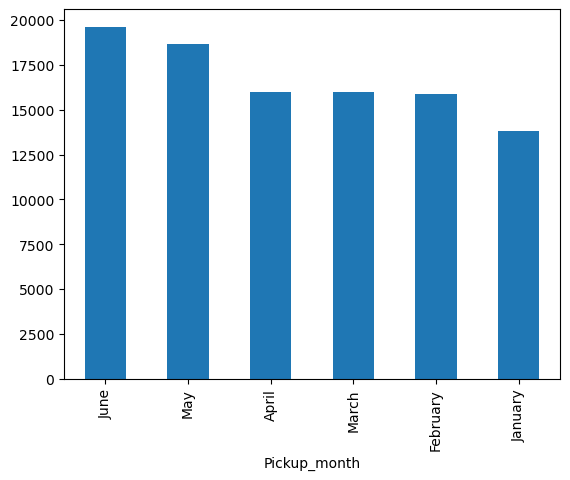

In [241]:
uber_15['Pickup_month'].value_counts().plot(kind='bar')

June seems to have most Uber Pickups

In [243]:
## taking it a step further to learn on which days of the weeek are popular
#extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [244]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Pickup_month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [245]:
pivot = pd.crosstab(index=uber_15['Pickup_month'] , columns=uber_15['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Pickup_month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='Pickup_month'>

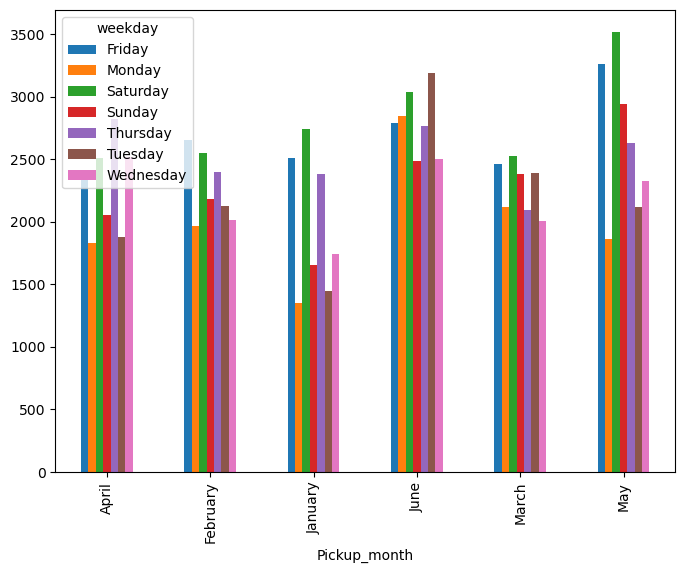

In [246]:
## grouped-bar plot using Pandas ..
pivot.plot(kind='bar' , figsize=(8,6))


The weekends seem to be the most popular day for uber rides in NYC, could be that riders are ubering to their favorite spots on their days off.
In particular in June, Tuesdays seemed to be the most popular day. Maybe uber offeres promos on Tuesdays or perhaps the day most people go into the office


# Find the hourly rush on all days

In [249]:
hourly_rush=uber_15.groupby(['Pickup_month','weekday' , 'hour'], as_index=False).size()

In [250]:
hourly_rush

,Pickup_month,weekday,hour,size
0,April,Friday,0,87
1,April,Friday,1,45
2,April,Friday,2,30
3,April,Friday,3,24
4,April,Friday,4,30
...,...,...,...,...
1003,May,Wednesday,19,172
1004,May,Wednesday,20,151
1005,May,Wednesday,21,164
1006,May,Wednesday,22,162


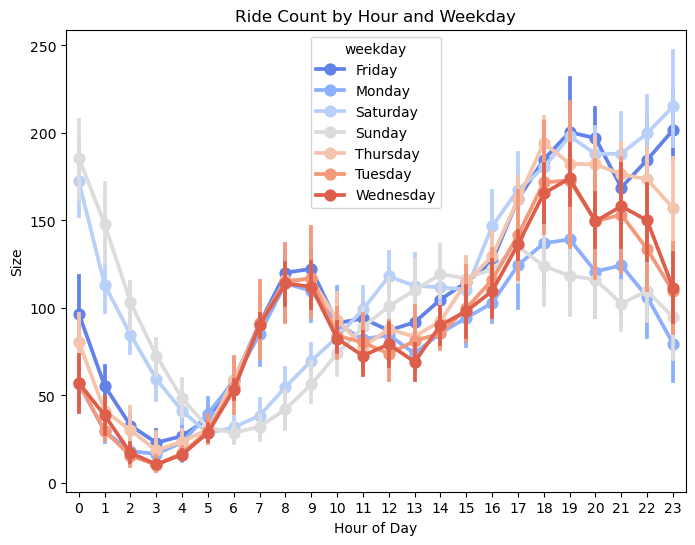

In [251]:
plt.figure(figsize=(8,6))
sns.pointplot(x="hour" , y="size" , hue="weekday" , data=hourly_rush, palette="coolwarm")
plt.title("Ride Count by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Size")
plt.show()

# Diving deeper into Tuesday since that is the most popular day in June

In [253]:
tuesday_data = hourly_rush[(hourly_rush["weekday"] == "Tuesday")& (hourly_rush["Pickup_month"] == 'June')]

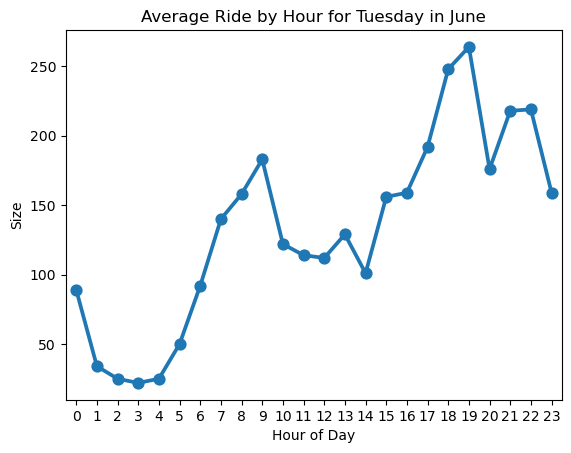

In [254]:
sns.pointplot(x="hour", y="size", data=tuesday_data)
plt.title("Average Ride by Hour for Tuesday in June")
plt.xlabel("Hour of Day")
plt.ylabel("Size")
plt.show()

We see that there are 2 big spikes on Tuesdays around the typical work hours going to and from.